<a href="https://colab.research.google.com/github/hajonghyun/inflearn_ML_from_the_foundation/blob/main/8_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install catboost

In [38]:
import os
import numpy as np
import pandas as pd
import gc # garbage collector

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [41]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
os.listdir('./drive/MyDrive/ROKAF/인프런_기초부터 쌓아가는 머신러닝/8주차_kaggle_data/data')

['train.csv', 'test.csv']

In [44]:
# Load Train and Test Data
train_df = pd.read_csv('./drive/MyDrive/ROKAF/인프런_기초부터 쌓아가는 머신러닝/8주차_kaggle_data/data/train.csv')
test_df = pd.read_csv('./drive/MyDrive/ROKAF/인프런_기초부터 쌓아가는 머신러닝/8주차_kaggle_data/data/test.csv')

In [45]:
# Check Data Size
print("train_df.shape:  ",train_df.shape)
print("test_df.shape:  ",test_df.shape)

# train_df 의 열 개수 = test_df 의 열 개수 +1
# target 값의 유무

train_df.shape:   (4459, 4993)
test_df.shape:   (49342, 4992)


In [46]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [47]:
test_df.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Train , Test 데이터의 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [49]:
# Data Preprocessing
# 결측치 유무

train_df.isnull().sum().sum()

np.int64(0)

In [50]:
test_df.isnull().sum().sum()

np.int64(0)

In [51]:
train_df['ID']

,ID
0,000d6aaf2
1,000fbd867
2,0027d6b71
3,0028cbf45
4,002a68644
...,...
4454,ff85154c8
4455,ffb6b3f4f
4456,ffcf61eb6
4457,ffea67e98


In [52]:
# 모델 학습에 의미 없는 상수 컬럼 삭제

colsToRemove = []

for col in train_df.columns:
    if col!='ID' and col!='target':
        if train_df[col].std()==0:
            colsToRemove.append(col)

train_df.drop(colsToRemove, axis=1, inplace=True)
test_df.drop(colsToRemove,axis=1, inplace=True)



In [53]:
print("삭제된 컬럼 수: ",len(colsToRemove))
print("삭제된 컬럼: ",colsToRemove)

삭제된 컬럼 수:  256
삭제된 컬럼:  ['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a742107', 

In [54]:
# 중복 컬럼 삭제 - 다중공선성

groups = train_df.columns.to_series().groupby(train_df.dtypes).groups
print(groups)
# print(groups.items())

dup_col = []

for key,value in groups.items():
    df_col = train_df[value].columns
    df=train_df[value]
    l_df_col = len(df_col)

    for i in range(l_df_col):
        i_df = df.iloc[:,i].values
        for j in range(i+1,l_df_col):
            j_df = df.iloc[:,j].values
            if np.array_equal(i_df,j_df):
                dup_col.append(df_col[i])

train_df = train_df.drop(dup_col,axis=1)
test_df = test_df.drop(dup_col,axis=1)


{int64: ['0deb4b6a8', 'a8cb14b00', '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115', '77c9823f2', '8d6c2a0b2', '4681de4fd', 'adf119b9a', '96f83a237', '6c7a4567c', '4fcfd2b4d', '71cebf11c', 'd966ac62c', 'c88d108c9', 'ff7b471cd', 'bc3f77679', '0eff5bf95', '2cb4d123e', '316b978cd', '5d5c5ce6d', 'ec863cb52', '69d8b4020', 'b0868a049', 'c36bcacc5', '151d318cd', 'ab0cddb90', 'c87722678', 'a8c320153', 'a04684f1f', '645b47cde', '7298ca1ef', 'd80abf8bc', '654dd8a3b', '7fc39583c', 'e421c414e', '964335fdf', '5a86cabd0', '6cb207ac9', 'c1bc828da', 'e90ed19da', 'c4d38135f', '968b01ca3', '26b423c42', '0b8e10df6', '603e85eb7', '605728195', 'ee7e4581d', 'a939664aa', 'a72e0bf30', 'e662f1672', '78a879b5d', 'bd550871c', '3268914c7', 'ec73030f6', 'c5b30277a', 'c16a7d537', 'bd6671d31', 'aab0aeb4b', '9a9b4a012', 'c377b9acf', 'f3e544d66', '80c0c9910', '9f8df01bd', '563d2f09a', '7ee833549', '7b58c8e37', 'cde9c35e8', '1e8801477', '3770cb9fa', '133714358', '15dba7177', '604ac0633', 'cbf34125e', '4563c7ee5', 'c6

In [70]:
train_df.shape

(4459, 4732)

In [71]:
train_df

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,ff85154c8,1065000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,48000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,2800000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


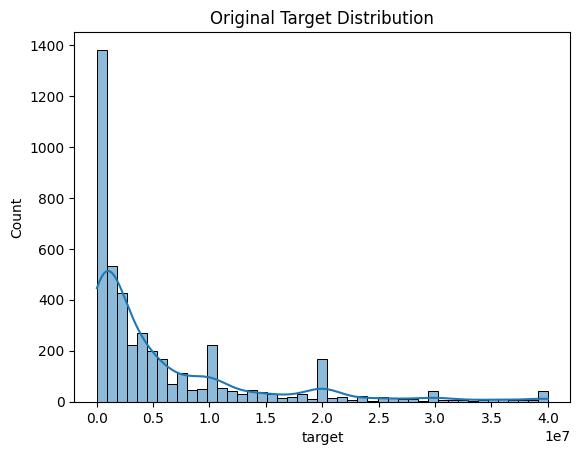

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target의 분포를 시각화 => 양의 왜도를 가지고 있으므로, 로그변환
sns.histplot(train_df['target'], kde=True)
plt.title('Original Target Distribution')
plt.show()

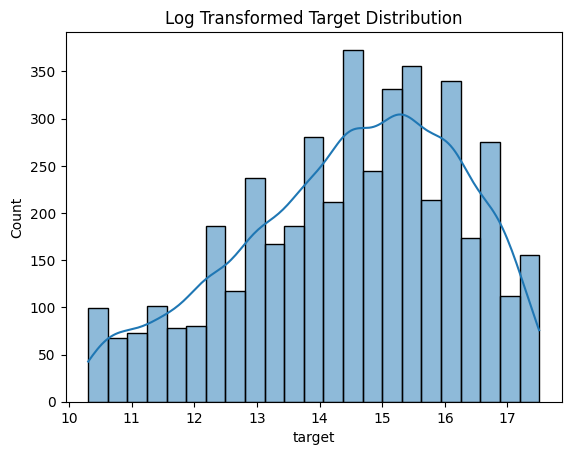

In [75]:
# 만약 로그 변환을 한다면, 변환 후의 분포도 확인
y_train_log = np.log1p(train_df['target'])
sns.histplot(y_train_log, kde=True)
plt.title('Log Transformed Target Distribution')
plt.show()

## **[Memo] 머신러닝 Target(y) 변수 왜도(Skewness) 처리 핵심 워크플로우**
    
    
#### **1. 왜 이 작업이 중요한가? (Why?)**
    
-   **모델의 안정성:** Target(y) 값의 분포가 한쪽으로 심하게 치우쳐 있으면, 소수의 극단적인 값(아웃라이어)이 모델 전체를 좌지우지하여 예측 성능이 불안정해진다.
-   **성능 향상:** 분포를 대칭(정규분포)에 가깝게 만들면, 특히 선형(Linear) 모델 계열의 성능이 크게 향상되고, 모델이 데이터의 일반적인 패턴을 더 잘 학습하게 된다.
    
#### **2. 언제 이 작업을 해야 하는가? (When?)**
    
이 작업은 **탐색적 데이터 분석(EDA) 및 데이터 전처리(Preprocessing)** 단계에서 이루어진다. 전체 머신러닝 워크플로우에서 위치는 다음과 같다.
    
1.  데이터 로드 및 기본 탐색 (결측치, 데이터 타입 등 확인)
    2.  **`[ ★ 바로 여기 ]` Target(y) 변수 분포 확인 및 변환**
    3.  피처(X)에 대한 상세 분석 및 전처리 (스케일링, 인코딩 등)
    4.  데이터셋 분리 (Train/Validation/Test)
    5.  모델 선택 및 학습
    6.  모델 평가 및 예측
    7.  **(중요) 예측 결과에 대한 역변환 적용**
    
    #### **3. 어떻게 해야 하는가? (How?) - 핵심 4단계 + 1**
    
    ##### **Step 1: 진단 - 분포 시각화 및 왜도 계산**
    
    -   가장 먼저 `y`값의 분포를 히스토그램이나 KDE 플롯으로 그려 눈으로 확인한다.
    -   `pandas.Series.skew()` 함수를 이용해 왜도 값을 정확히 계산한다.
    
    ##### **Step 2: 처방 - 왜도 값에 따라 적절한 변환 적용**
    
    -   **왜도 > 0.5 (양의 왜도 / Right-Skewed):**
        -   **처방:** `np.log1p()` 변환을 우선 적용한다. (소수의 큰 값의 영향을 줄여줌)
        -   **대안:** `np.sqrt()` (제곱근 변환)도 효과적일 수 있다.
    
    -   **왜도 < -0.5 (음의 왜도 / Left-Skewed):**
        -   **처방:** `y**2` 또는 `y**3` 같은 거듭제곱 변환을 적용한다. (값들의 오른쪽 간격을 넓혀줌)
    
    -   **|왜도| < 0.5 (대칭에 가까움):**
        -   **처방:** 분포가 비교적 안정적이므로 **특별한 변환을 적용하지 않는다.**
    
    ##### **Step 3: 확인 - 변환 후 분포 재확인**
    
    -   변환을 적용한 `y`값의 분포를 다시 시각화하고 왜도 값을 계산하여, 분포가 대칭에 가깝게 개선되었는지 반드시 확인한다.
    
    ##### **Step 4: 학습 - 변환된 y값으로 모델 학습**
    
    -   전처리가 완료된 피처(X)와 **변환된 `y`**를 사용하여 모델을 학습시킨다.
    
    ##### **Step 5: (가장 중요) 역변환 - 예측값을 원래 스케일로 되돌리기**
    
    -   학습된 모델이 내놓는 예측값(prediction)은 **변환된 스케일의 값**이다.
    -   따라서 최종 결과로 사용하기 위해 반드시 원래 스케일로 되돌리는 **역변환**을 적용해야 한다.
        -   `np.log1p(y)`로 학습했다면 → 예측값에 `np.expm1(prediction)` 적용
        -   `y**2`로 학습했다면 → 예측값에 `np.sqrt(prediction)` 적용
    
    ---
    **핵심 요약:** 모델을 학습시키기 전, y의 분포를 확인하고 그에 맞는 처방(변환)을 내리는 것은 모델의 성능과 안정성을 높이는 가장 효과적인 방법 중 하나이다. **진단(skew) -> 처방(transform) -> 확인(re-skew) -> 역변환(inverse)**의 흐름을 항상 기억하자.   

In [76]:
x_train = train_df.drop(['ID','target'],axis=1)
y_train = np.log1p(train_df['target'].values)  # 로그변환!!!!

x_test = test_df.drop(['ID'],axis=1)

In [77]:
# train, val
dev_x,val_x,dev_y,val_y = train_test_split(x_train,y_train,test_size=0.2,random_state=2021)

In [85]:
# build lightGBM model & Predict

params = {
    'objective': 'regression',
    'metric':'rmse', # 'matric' -> 'metric' 오타 수정
    'num_leaves':40,
    'learning_rate':0.04,
    'bagging_fraction':0.6,
    'bagging_frequency':6,
    'bagging_seed':2021,
    'verbosity':-1,
    'seed':2021
}
lgtrain = lgb.Dataset(dev_x,dev_y)
lgval = lgb.Dataset(val_x,val_y)

# 1. 텅 빈 훈련 일지(딕셔너리) 준비
evals_result = {}

# 2. lgb.train 함수 호출
model = lgb.train(
            params=params,
            train_set=lgtrain,
            num_boost_round=5000,
            valid_sets=[lgtrain, lgval],
            # 3. 모든 담당관(기능)을 callbacks 리스트 안에 배치
            callbacks=[
                # '조기 종료' 담당관
                lgb.early_stopping(stopping_rounds=1000, verbose=True),
                # '중간 보고' 담당관
                lgb.log_evaluation(period=150),
                # '훈련 일지 기록' 담당관
                lgb.record_evaluation(evals_result)
            ]
    )

Training until validation scores don't improve for 1000 rounds
[150]	training's rmse: 0.872132	valid_1's rmse: 1.41141
[300]	training's rmse: 0.688301	valid_1's rmse: 1.4196
[450]	training's rmse: 0.593435	valid_1's rmse: 1.42963
[600]	training's rmse: 0.52386	valid_1's rmse: 1.43675
[750]	training's rmse: 0.472551	valid_1's rmse: 1.4451
[900]	training's rmse: 0.430453	valid_1's rmse: 1.45141
[1050]	training's rmse: 0.392836	valid_1's rmse: 1.46007
Early stopping, best iteration is:
[87]	training's rmse: 1.02691	valid_1's rmse: 1.40871


In [86]:
# np.log1p를 다시 되돌리는 exp => np.expm1
prediction = model.predict(x_test,num_iteration=model.best_iteration)
pred_test_y = np.expm1(prediction)

In [87]:
pred_test_y

array([1885140.41400515, 1627436.25810052, 2009736.94777317, ...,
        976094.76104025,  463952.5916152 , 1937760.24297193])

In [88]:
# feature importance를 볼 수 있다.
gain = model.feature_importance('gain')
feaureimp = pd.DataFrame({
    'feature':model.feature_name(),
    'split':model.feature_importance('split'),
    'gain':100*gain/gain.sum()
}).sort_values('gain',ascending=False)

In [89]:
feaureimp

,feature,split,gain
4130,f190486d6,97,13.059700
2375,58e2e02e6,88,6.788579
4020,15ace8c9f,57,2.921717
3465,eeb9cd3aa,56,2.782071
3661,491b9ee45,29,2.105018
...,...,...,...
1696,a403d93e5,0,0.000000
1695,7250feb72,0,0.000000
1694,2e7f340f2,0,0.000000
1693,9133963bd,0,0.000000


### **A-Z까지의 머신러닝 워크플로우 (A to Z Machine Learning Workflow)**

#### **0단계: 문제 정의 (Problem Definition)**
-   **(비유: 시험 과목과 목표 점수 설정하기)**
-   **핵심 목표:** 우리가 무엇을 예측하려 하는지, 모델의 성공 기준(Metric, 예: RMSE)이 무엇인지 명확히 정의합니다.
-   **주요 활동:**
    -   "아파트 가격을 예측하는 회귀 문제인가, 아니면 생존 여부를 맞추는 분류 문제인가?"
    -   "어떤 기준으로 모델을 평가할 것인가? (RMSE, Accuracy 등)"

#### **1단계: 데이터 확보 및 불러오기 (Data Acquisition)**
-   **(비유: 시험공부에 필요한 교과서, 문제집 확보하기)**
-   **핵심 목표:** 분석에 필요한 데이터를 불러와 작업 환경에 준비시킵니다.
-   **주요 활동:**
    -   `pandas` 라이브러리를 사용해 `train.csv`, `test.csv` 등의 파일을 데이터프레임으로 로드합니다.

#### **2단계: 탐색적 데이터 분석 (EDA - Exploratory Data Analysis)**
-   **(비유: 본격적인 공부 전, 교과서 목차와 내용 훑어보기)**
-   **핵심 목표:** 데이터의 구조, 분포, 결측치, 이상치 등을 파악하여 데이터에 대한 이해도를 높이고 전처리 전략을 세웁니다. **가장 시간이 많이 걸리고 중요한 단계 중 하나입니다.**
-   **주요 활동:**
    -   `.head()`, `.info()`, `.describe()`로 데이터의 기본 정보 파악
    -   결측치(`missing value`) 확인 및 처리 방법 구상
    -   피처(Feature)들의 데이터 타입 확인 (숫자형, 문자열/범주형)
    -   **(★핵심★) Target 변수(y)의 분포 확인 (왜도 체크!) → 로그 변환(`np.log1p`) 등 변환 여부 결정**
    -   데이터 시각화 (히스토그램, 박스 플롯, 상관관계 히트맵 등)

#### **3단계: 데이터 전처리 및 피처 엔지니어링 (Preprocessing & Feature Engineering)**
-   **(비유: 공부하기 좋게 요약 노트 만들고, 여러 과목 지식 융합하기)**
-   **핵심 목표:** 모델이 학습할 수 있는 형태로 데이터를 다듬고, 성능을 높일 수 있는 새로운 피처를 만들어냅니다.
-   **주요 활동:**
    -   결측치 처리 (특정 값으로 채우기, 삭제 등)
    -   **(★핵심★) 문자열/범주형 피처를 숫자로 변환 (인코딩): `astype('category')`, One-Hot Encoding 등**
    -   필요시 숫자형 데이터 스케일링 (StandardScaler, MinMaxScaler 등)
    -   기존 피처를 조합하거나 분해하여 새로운 피처 생성 (예: 날짜 데이터에서 '연도', '월' 추출)
    -   **(★핵심★) `gain` 지수 등을 참고하여 불필요한 피처 제거 (Feature Selection)**

#### **4. 훈련/검증 데이터 분리 (Train/Validation Split)**
-   **(비유: 공부할 교과서와 실력 점검용 모의고사 분리하기)**
-   **핵심 목표:** 모델의 성능을 객관적으로 평가하기 위해 전체 훈련 데이터를 '실제 학습용'과 '성능 검증용'으로 나눕니다.
-   **주요 활동:**
    -   `sklearn.model_selection.train_test_split`을 사용하여 `train_set`을 `dev_set`과 `val_set`으로 분리

#### **5. 모델 선택 및 학습 (Model Selection & Training)**
-   **(비유: 공부 계획에 맞춰 집중적으로 학습하기)**
-   **핵심 목표:** 문제 유형에 맞는 머신러닝 모델을 선택하고, 준비된 데이터로 학습을 진행합니다.
-   **주요 활동:**
    -   문제에 적합한 모델 선택 (LightGBM, XGBoost, RandomForest 등)
    -   모델의 하이퍼파라미터 초기값 설정
    -   **(★핵심★) `dev_set`으로 모델을 학습(`fit` 또는 `train`)시키고, `val_set`으로 성능을 모니터링하며 `early_stopping` 적용**

#### **6. 모델 튜닝 (Hyperparameter Tuning)**
-   **(비유: 오답 노트를 보며 나에게 맞는 공부법 찾기)**
-   **핵심 목표:** '모의고사' 점수를 가장 높일 수 있는 최적의 하이퍼파라미터 조합을 찾습니다.
-   **주요 활동:**
    -   Grid Search, Random Search, Bayesian Optimization 등의 기법을 사용하여 최적의 하이퍼파라미터 탐색

#### **7. 예측 및 제출 (Prediction & Submission)**
-   **(비유: 최종 수능 시험 보고 답안지 제출하기)**
-   **핵심 목표:** 최종적으로 튜닝된 모델을 사용하여 '실제 시험지'(`test_set`)의 정답을 예측하고, 정해진 형식에 맞춰 제출 파일을 생성합니다.
-   **주요 활동:**
    -   최적의 파라미터로 모델 재학습 (간혹 전체 `train_set`으로 다시 학습하기도 함)
    -   학습된 모델을 사용해 `test_set`에 대한 예측 수행 (`.predict()`)
    -   **(★핵심★) Target 변수에 로그 변환 등을 적용했다면, 예측값에 역변환(`np.expm1`) 적용**
    -   제출 형식에 맞게 `submission.csv` 파일 생성

---
이 8단계의 흐름이 머신러닝 프로젝트의 가장 표준적인 뼈대입니다. 각 단계에서 우리가 함께 이야기 나눴던 핵심 개념들이 어떻게 연결되는지 생각하며 이 흐름을 따라가시면, 앞으로 어떤 프로젝트를 하시든 길을 잃지 않으실 겁니다.

In [55]:
import pandas as pd
import numpy as np

# 데이터 생성
np.random.seed(42) # 결과를 동일하게 재현하기 위해 시드 고정
data = {
    'OrderID': range(1, 11),
    'CustomerID': ['C1', 'C2', 'C1', 'C3', 'C2', 'C1', 'C3', 'C4', 'C2', 'C3'],
    'ProductCategory': ['Electronics', 'Clothing', 'Electronics', 'Home Goods', 'Clothing', 'Home Goods', 'Electronics', 'Beauty', 'Electronics', 'Home Goods'],
    'ProductName': ['Laptop', 'T-shirt', 'Mouse', 'Lamp', 'Jeans', 'Towel', 'Keyboard', 'Sunscreen', 'Monitor', 'Plate'],
    'OrderAmount': np.random.randint(10000, 100000, 10),
    'Quantity': np.random.randint(1, 5, 10)
}
sales_df = pd.DataFrame(data)
sales_df['Revenue'] = sales_df['OrderAmount'] * sales_df['Quantity'] # 총 매출액 컬럼 추가

print("--- 원본 데이터 ---")
print(sales_df)

--- 원본 데이터 ---
   OrderID CustomerID ProductCategory ProductName  OrderAmount  Quantity  \
0        1         C1     Electronics      Laptop        25795         4   
1        2         C2        Clothing     T-shirt        10860         3   
2        3         C1     Electronics       Mouse        86820         2   
3        4         C3      Home Goods        Lamp        64886         1   
4        5         C2        Clothing       Jeans        16265         2   
5        6         C1      Home Goods       Towel        92386         4   
6        7         C3     Electronics    Keyboard        47194         4   
7        8         C4          Beauty   Sunscreen        97498         2   
8        9         C2     Electronics     Monitor        54131         2   
9       10         C3      Home Goods       Plate        70263         2   

   Revenue  
0   103180  
1    32580  
2   173640  
3    64886  
4    32530  
5   369544  
6   188776  
7   194996  
8   108262  
9   140526  


In [56]:
#1_1
sales_df.groupby('ProductCategory')['Revenue'].sum()

,Revenue
ProductCategory,
Beauty,194996
Clothing,65110
Electronics,573858
Home Goods,574956


In [57]:
#1_2
sales_df.groupby('ProductCategory')['OrderAmount'].mean()

,OrderAmount
ProductCategory,
Beauty,97498.0
Clothing,13562.5
Electronics,53485.0
Home Goods,75845.0


In [58]:
#1_3
sales_df.groupby('ProductCategory')['CustomerID'].nunique()

,CustomerID
ProductCategory,
Beauty,1
Clothing,1
Electronics,3
Home Goods,2


In [59]:
#sales_df['CategoryRevenueShare']
sales_df.groupby('ProductCategory')['Revenue'].sum()

,Revenue
ProductCategory,
Beauty,194996
Clothing,65110
Electronics,573858
Home Goods,574956


In [60]:
sales_df.groupby('ProductCategory')['Revenue'].transform('sum')

,Revenue
0,573858
1,65110
2,573858
3,574956
4,65110
5,574956
6,573858
7,194996
8,573858
9,574956


In [61]:
sales_df['CategoryRevenueShare']  =  sales_df['Revenue']/sales_df.groupby('ProductCategory')['Revenue'].transform('sum')*100
sales_df

,OrderID,CustomerID,ProductCategory,ProductName,OrderAmount,Quantity,Revenue,CategoryRevenueShare
0,1,C1,Electronics,Laptop,25795,4,103180,17.980058
1,2,C2,Clothing,T-shirt,10860,3,32580,50.038397
2,3,C1,Electronics,Mouse,86820,2,173640,30.258357
3,4,C3,Home Goods,Lamp,64886,1,64886,11.285385
4,5,C2,Clothing,Jeans,16265,2,32530,49.961603
5,6,C1,Home Goods,Towel,92386,4,369544,64.273440
6,7,C3,Electronics,Keyboard,47194,4,188776,32.895943
7,8,C4,Beauty,Sunscreen,97498,2,194996,100.000000
8,9,C2,Electronics,Monitor,54131,2,108262,18.865643
9,10,C3,Home Goods,Plate,70263,2,140526,24.441175


문제 3: 특정 조건을 만족하는 그룹만 골라내기 (Filtering의 본질)
[문제]
우리 회사의 "우수 고객(VIP)" 데이터를 모두 추출하고 싶습니다. 우수 고객은 평균 주문 금액(OrderAmount)이 55,000원을 초과하는 고객으로 정의합니다. 이 기준을 만족하는 고객들의 모든 주문 기록을 담은 데이터프레임을 만들어보세요.

[핵심 포인트]
단순히 특정 행의 값이 아닌, '그룹 전체의 속성(예: 그룹의 평균, 합계, 개수 등)'을 기준으로 데이터를 걸러내는 방법을 익히는 문제입니다. df[df['OrderAmount'] > 55000] 같은 단순한 boolean 인덱싱으로는 해결할 수 없습니다. 그룹 전체를 대상으로 조건을 평가하고, 조건을 만족하는 그룹의 '모든 행'을 통째로 가져오는 것이 filter의 역할입니다.

[힌트]
filter() 함수와 lambda를 함께 사용해야 합니다. lambda x:에서 x는 각 CustomerID 그룹(데이터프레임 조각)을 의미합니다. 이 x에 대해 평균을 계산하는 조건을 어떻게 작성할 수 있을까요?

In [62]:
import pandas as pd
import numpy as np

# 이 부분을 꼭 포함하고 다시 실행해 보세요!
np.random.seed(42)

# 데이터 생성
data = {
    'OrderID': range(1, 11),
    'CustomerID': ['C1', 'C2', 'C1', 'C3', 'C2', 'C1', 'C3', 'C4', 'C2', 'C3'],
    'ProductCategory': ['Electronics', 'Clothing', 'Electronics', 'Home Goods', 'Clothing', 'Home Goods', 'Electronics', 'Beauty', 'Electronics', 'Home Goods'],
    'ProductName': ['Laptop', 'T-shirt', 'Mouse', 'Lamp', 'Jeans', 'Towel', 'Keyboard', 'Sunscreen', 'Monitor', 'Plate'],
    'OrderAmount': np.random.randint(10000, 100000, 10),
    'Quantity': np.random.randint(1, 5, 10)
}
sales_df = pd.DataFrame(data)
sales_df['Revenue'] = sales_df['OrderAmount'] * sales_df['Quantity']

In [65]:
up55000 = sales_df.groupby('CustomerID')['OrderAmount'].mean()>55000


In [66]:
vip_list = up55000[up55000].index
vip_list

Index(['C1', 'C3', 'C4'], dtype='object', name='CustomerID')

In [67]:
sales_df[sales_df['CustomerID'].isin(vip_list)]

,OrderID,CustomerID,ProductCategory,ProductName,OrderAmount,Quantity,Revenue
0,1,C1,Electronics,Laptop,25795,4,103180
2,3,C1,Electronics,Mouse,86820,2,173640
3,4,C3,Home Goods,Lamp,64886,1,64886
5,6,C1,Home Goods,Towel,92386,4,369544
6,7,C3,Electronics,Keyboard,47194,4,188776
7,8,C4,Beauty,Sunscreen,97498,2,194996
9,10,C3,Home Goods,Plate,70263,2,140526


In [68]:
sales_df.groupby('CustomerID')['OrderAmount'].mean()>55000

,OrderAmount
CustomerID,
C1,True
C2,False
C3,True
C4,True


In [69]:
vip_df = sales_df.groupby('CustomerID').filter(lambda x: x['OrderAmount'].mean()>55000)
vip_df

,OrderID,CustomerID,ProductCategory,ProductName,OrderAmount,Quantity,Revenue
0,1,C1,Electronics,Laptop,25795,4,103180
2,3,C1,Electronics,Mouse,86820,2,173640
3,4,C3,Home Goods,Lamp,64886,1,64886
5,6,C1,Home Goods,Towel,92386,4,369544
6,7,C3,Electronics,Keyboard,47194,4,188776
7,8,C4,Beauty,Sunscreen,97498,2,194996
9,10,C3,Home Goods,Plate,70263,2,140526
